
# Multiple plots
Using aesthetics, we can separetely show the cars with different colors and sizes in one graph. 

Another way to do this is to split your plot into facets, subplots that each display one type of cars.

To facet your plot by a single variable, use `facet_wrap()`. The first argument of `facet_wrap()` should be a formula, which you create with `~` followed by a variable name (here `formula` is the name of a data structure in R, not a synonym for equation). The variable that you pass to `facet_wrap()` should be discrete.


```r
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy))+
  facet_wrap(~class, nrow=2)
```

To facet your plot on the combination of two variables, add `facet_grid()` to your plot call. The first argument of `facet_grid()` is also a formula. This time the formula should contain two variable names separated by a `~`.

```r
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy))+
  facet_grid(drv ~ cyl)
```

```r
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy))+
  facet_grid(. ~ cyl)
```

## Your turn

* What happens if you facet on a numerical variable? (e.g., `cty`)

<!--```{r eval=FALSE,echo=FALSE}
ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point() +
  facet_grid(. ~ cty)
```-->

* Read `?facet_wrap` and try the `scales` argument.


* What are the advantages to using faceting instead of the color aesthetic? What are the disadvantages? How might the balance change if you had a larger dataset?


* When using `facet_grid()`, you can put the variable with more unique levels in the columns or rows. Which is better? (try facet with `class` and `cyl` in two different ways )


# Five graphs

In ggplot2 syntax, different geom functions uses a different visual object to represent the data.  A `geom` is the geometrical object that a plot uses to represent data. 

We will focus five important graphs

1. scatterplots
2. linegraphs
3. histograms
4. boxplots
5. barplots


## Scatterplots

Scatterplots allow you to visualize the relationship between two numerical variables. 
```r
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy))
```

One problem with the scatterplot of `hwy` and `displ` is that 
the values of `hwy` and `displ` are rounded so the points appear on a grid and many points overlap each other. 

When overplotting occurs, it is difficult to know the number of points being plotted. There are two methods to address the issue of overplotting. Either by

1. Adjusting the transparency of the points or
2. Adding a little random “jitter”, or random “nudges”, to each of the points.

###  Changing the transparency
We can change the transparency by the argument `alpha` in `geom_point()`.  The argument can take any value between 0 and 1, where 0 sets the points to be 100% transparent and 1 sets the points to be 100% opaque.
```r
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy),alpha=0.2)
```


The key feature to note in the plot is that the transparency of the points is cumulative: areas with a high-degree of overplotting are darker, whereas areas with a lower degree are less dark.

### Jittering the points
The second way of addressing overplotting is by jittering all the points. This means giving each point a small “nudge” in a random direction.


```r
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy),  position="jitter")
```


Keep in mind jittering is strictly a visualization tool; even after creating a jittered scatterplot, the original values saved in the data frame remain unchanged.



### Your turn
*  `position="jitter"` cannot specify how much noise to add. Another way of jittering is to use  `geom_jitter()` instead of `geom_point()` 
Try the following code and use help page to find how to control the amount of jittering?

<!--
 ```{r eval=FALSE}
ggplot(data = mpg) +
  geom_jitter(mapping = aes(x = displ, y = hwy))
```
Note that the height and width arguments are in the units of the data. Thus height = 1 (width = 1) corresponds to different relative amounts of jittering depending on the scale of the y (x) variable. The default values of height and width are defined to be 80% of the resolution() of the data, which is the smallest non-zero distance between adjacent values of a variable. When x and y are discrete variables, their resolutions are both equal to 1, and height = 0.4 and width = 0.4 since the jitter moves points in both positive and negative directions. -->
* Compare and contrast `geom_jitter()` with `geom_count()`

<!--ggplot(data = mpg) +
  geom_count(mapping = aes(x = displ, y = hwy))-->

## Linegraphs

Linegraphs show the relationship between two numerical variables when the variable on the x-axis, also called the *explanatory* variable, is of a sequential nature. In other words, there is an inherent ordering to the variable.


### `geom_line`
`geom_line` connects the point in the order of the variable on the `x`-axis. It visulizes the trend of the data and thus is frequently used when time is the explanatory variable on the `x`-axis
```r
ggplot(data = mpg) +
  geom_line(mapping = aes(x = displ, y = hwy))
```

### Your turn
* Replace `geom_line()` with `geom_path()` to see what happens. Explain the difference

### `geom_smooth()`
We can plot a smooth line fitted to the data using `geom_smooth`
```r
ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy))
```


Every geom function in ggplot2 takes a mapping argument. However, not every aesthetic works with every geom.  `geom_smooth()` will draw a different line, with a different `linetype`, for each unique value of the variable that you map to linetype.

```r
ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy,linetype = drv))
```

### Your turn

*  Create a graph with both points and smoothed lines and coloring everything (both the points and lines) according to `drv`

<!--```{r eval=FALSE, echo=FALSE}
ggplot(data = mpg) +
   geom_point(mapping = aes(x = displ, y = hwy,color = drv))+
  geom_smooth(mapping = aes(x = displ, y = hwy,color = drv))
```-->

* Compare the following two plots

```r
ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy,linetype = drv))

ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy,group = drv))
```

## Histrograms
We can plot a  histogram if we only care about how the values of one variable distribution:

1. What are the smallest and largest values?
2. What is the “center” or “most typical” value?
3. How do the values spread out?
4. What are frequent and infrequent values?

A histogram is a plot that visualizes the distribution of a numerical value as follows:

1. We first cut up the x-axis into a series of bins, where each bin represents a range of values.
2. For each bin, we count the number of observations that fall in the range corresponding to that bin.
3. Then for each bin, we draw a bar whose height marks the corresponding count.

### `geom_histogram()`


```r
ggplot(mpg)+
  geom_histogram(mapping = aes(x=hwy))
```


Unlikescatterplots and linegraphs, there is now only one variable being mapped in `aes()`: the single numerical variable `hwy`. The y-aesthetic of a histogram, the count of the observations in each bin, gets computed for you automatically.

Question: what is the requirement for the type of variable in `x`?

It is hard to distinguish each bin. We can use the `color` argument to add  borders.
```r
ggplot(mpg)+
  geom_histogram(mapping = aes(x=hwy),color="white")
```

You can use the `fill` argument to change the color of the bars
```r
ggplot(mpg)+
  geom_histogram(mapping = aes(x=hwy),color="white", fill ="steelblue")
```

If you’re curious, run `colors()` to see all possible choice of colors in R.

###  Adjusting the bins
In the plot above, there are 30 bins in the range  3-45. Thus each bin has about width 42/30, which is not easy to interpret.
We can improve this by adjusting the number of bins in our histogram in one of three ways:

1. By adjusting the number of bins via the `bins` argument to `geom_histogram()`.
2. By adjusting the width of the bins via the `binwidth` argument to `geom_histogram()`.
3. By providing the bin bounderies via the `breaks` argument to `geom_histogram()`

For the first method, we can use the `bins` argument specify how many bins we would like to cut the x-axis up in.

```r
ggplot(mpg)+
  geom_histogram(mapping = aes(x=hwy),color="white",bins=40)
```

For the second method, we can use the `binwidth` argument to specify the width of the bins.
```r
ggplot(mpg)+
  geom_histogram(mapping = aes(x=hwy),color="white",binwidth=1)
```

For the third method, we can use the `breaks` argument to specify the boundaries of the bins.
```r
ggplot(mpg)+
  geom_histogram(mapping = aes(x=hwy),color="white",breaks=10:45)
```


You can describe the distribution based on the histogram. The spread is the range of the data. The shape describes the type of graph. 

Determining the shape of your variable is essential before any further analysis is done. Statistical methods used for inference often require your data to be distributed in a certain manner before they can be applied to the data.
You can describe shape in terms of whether it is symmetric, how many peaks it has, if it is skewed to the left or right, and whether it is uniform.

**Normal distribution**  (also referred to as the Gaussian distribution) is a very common distribution and is often described as a bell-shaped curve. In this distribution, the values are symmetric around the central value with a high density of the values falling right around the central value.

<img src="./figures/visualization/normal.jpg" alt="ds" style="width: 750px;"/>

A variable can be described as normally distributed if:   

* There is a strong tendency for data to take a central value --- many of the observations are centered around the middle of the range.  

* Deviations away from the central value are equally likely in both directions --- the frequency of these deviations away form the central value occurs at the same rate on either side of the central value.


**Skewed distribution**:  most of the values fall to one end of the range, leaving a tail off to the other side.

<img src="./figures/visualization/skew.jpg" alt="ds" style="width: 750px;"/>

**Uniform distribution**: values for a variable are equally likely to be found along any portion of the distribution. 

**Outliers**: are observations that fall far away from the rest of the observations in the distribution.

<img src="./figures/visualization/outlier.jpg" alt="ds" style="width: 750px;"/>


### Your turn

* Create histograms for `cty` and `displ` respectively. Describe how the variables distribute.

### `geom_freqpoly()`
`geom_freqpoly()`displays the counts with lines instead of bars.
```r
ggplot(mpg)+
  geom_freqpoly(mapping = aes(x=hwy))
ggplot(mpg)+
  geom_freqpoly(mapping = aes(x=hwy,color=drv))
```


## Boxplots
 
### `geom_boxplot()`
 What if we want to compare the distribution of a numerical variable split by the values of another variable? For example, suppose we want to know the distribution of `hwy` in each value of `drv`. We can use freqpoly or  faceted histograms.
```r
 ggplot(mpg)+
  geom_freqpoly(mapping = aes(x=hwy,color = drv))

 ggplot(mpg)+
  geom_histogram(mapping = aes(x=hwy),color="white")+
  facet_wrap(~drv)
```


Another type of visualization that achieves this same goal is a side-by-side boxplot.
It compactly displays the distribution of a numerical variable by visualizing several **summary statistics** (e.g. minimum, maximum, median,quartiles). 

```r
ggplot(mpg)+
  geom_boxplot(mapping = aes(y=hwy))
```

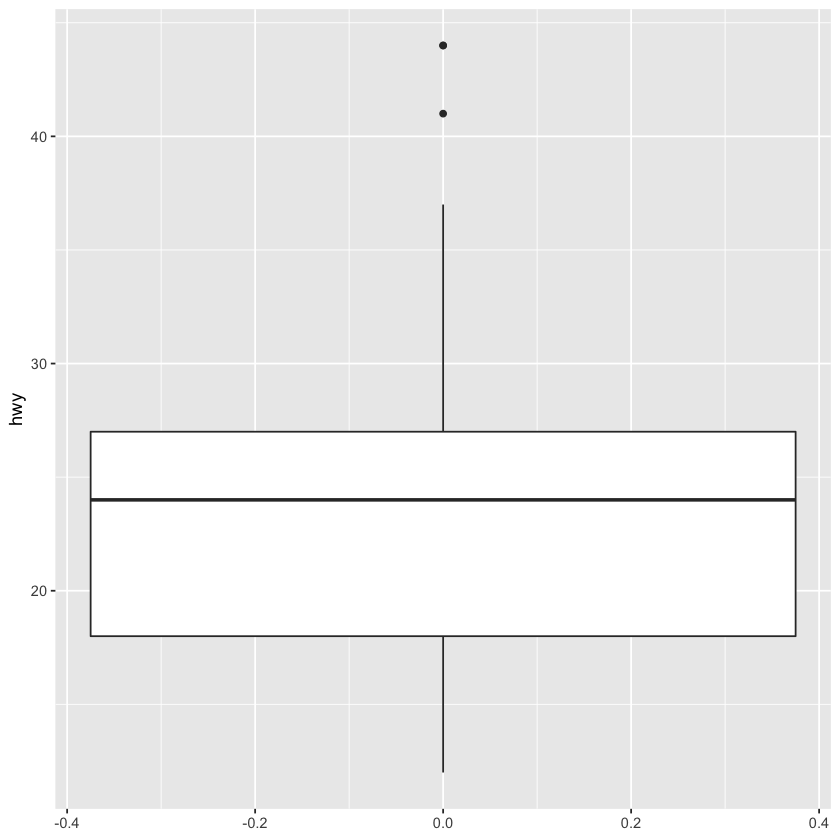

In [34]:
ggplot(mpg)+
  geom_boxplot(mapping = aes(y=hwy))

The boxplot summarizes the 234 points by cutting them into quartiles at the dashed lines, where each quartile contains roughly `234/5=47` observations. Thus

1. 25% of points fall below the bottom edge of the box, which is the first quartile of 18. In other words, 25% of observations were below 18 miles per gallon.

2. 25% of points fall between the bottom edge of the box and the solid middle line, which is the median of 24. Thus, 25% of observations were between 18 and 24 and 50% of observations were below 24.

3. 25% of points fall between the solid middle line and the top edge of the box, which is the third quartile of 27. It follows that 25% of observations were between 24 and 27 and 75% of observations were below 27.

4. 25% of points fall above the top edge of the box. In other words, 25% of observations were above 27.

The middle 50% of points lie within the interquartile range (IQR) between the first and third quartile. Thus, the IQR for this example is 27 - 18 = 9. The interquartile range is a measure of a numerical variable’s spread.

Furthermore,  we see the whiskers of the boxplot. The whiskers stick out from either end of the box all the way to the minimum and maximum observed temperatures of 12 and  44, respectively. However, the whiskers don’t always extend to the smallest and largest observed values. They in fact extend no more than  $1.5\times$ the interquartile range from either end of the box. In this case, no more than $1.5 \times 9 =13.5$ from either end of the box. Any observed values outside this range get marked with points called outliers.


We can create a side-by-side boxplot of `hwy` split by `drv`. We do this by mapping `drv` to the `x`-position aesthetic, `hwy` to the `y`-position aesthetic

```r
ggplot(mpg)+
  geom_boxplot(mapping = aes(x=drv,y=hwy))

```


### Your turn
* Can the variable in `x`-position be numerical?

* Create a boxplot  of `hwy` split by `class`. Interpret your findings.



### Violin plots
A violin plot displays  the distribution of a numerical variable. You can view it as a blend of boxplots and histograms.

```r
ggplot(mpg)+
  geom_violin(mapping = aes(x=class,y=hwy))

```

## Barplots
 Both histograms and boxplots are tools to visualize the distribution of numerical variables.
 Another commonly desired task is to visualize the distribution of a categorical variable. This is a simpler task, as we can simply count different categories within a categorical variable.
 
### `geom_bar()`


A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. 
```r
ggplot(mpg)+
  geom_bar(mapping = aes(x=drv))

ggplot(mpg)+
  geom_bar(mapping = aes(x=trans))
```


### Two categorical variables
Another use of barplots is to visualize the joint distribution of two categorical variables at the same time. 

Suppose we want to know the distribution of `trans` split by `drv`
We can now map the additional variable `drv` by adding a `fill = drv` inside the `aes()` aesthetic mapping.

```r
ggplot(mpg)+
  geom_bar(mapping = aes(x=trans,fill = drv ))

```

The `fill` argument controls the color of the bars, while the `color` argument controls the color of the outline of the bars.

```r
ggplot(mpg)+
  geom_bar(mapping = aes(x=trans,color = drv ))
```


It is difficult to compare the heights of the different colors between the bars. We can use the position adjustment (we will learn more about this later)
```r
ggplot(mpg)+
  geom_bar(mapping = aes(x=trans,fill = drv ),position = "dodge")

```


## Summary
<img src="./figures/visualization/summary_fivegraphs.jpg" alt="ds" style="width: 750px;"/>

## Global mappings
To display multiple geoms in the same plot, add multiple geom functions to `ggplot()`
```r
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) +
  geom_smooth(mapping = aes(x = displ, y = hwy))
```

This introduces some duplication in our code. You can avoid this type of repetition by passing a set of mappings to `ggplot()`. ggplot2 will treat these mappings as global mappings that apply to each geom in the graph.  The following code will produce the same plot as the previous code:

```r
ggplot(data = mpg,mapping = aes(x = displ, y = hwy)) + 
  geom_point() +
  geom_smooth()
```

If you place mappings in a geom function, `ggplot2` will treat them as local mappings for the layer. It will use these mappings to extend or overwrite the global mappings for that layer only. 
```r
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point(mapping = aes(color = class)) + 
  geom_smooth()
```

You can use the same idea to specify different data for each layer. In the followingn code, the smooth line displays just a subset of the mpg dataset, the subcompact cars. The local data argument in `geom_smooth()` overrides the global data argument in `ggplot()` for that layer only.
```r
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point(mapping = aes(color = class)) + 
  geom_smooth(data = filter(mpg, class == "subcompact"), se = FALSE)
```


## Your turn
* Run this code in your head and predict what the output will look like. Then, run the code in R and check your predictions.

```r
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, color = drv)) +
  geom_point() +
  geom_smooth(se = FALSE)
```

* Run the following codes and explain what they do 

```r
ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point(aes(color = drv)) +
  geom_smooth(aes(linetype = drv), se = FALSE)

ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point(size = 4, color = "white") +
  geom_point(aes(color = drv))
```
